# **✨Markov Decision Processes(MDPs)**

## **📑Table of Contents**

1. [Introduction to Markov Decision Processes (MDPs)](#1-introduction-to-markov-decision-processes-mdps)
   - 1.1 [Core Concept](#11-core-concept)
   - 1.2 [Mathematical Foundation of MDPs](#12-mathematical-foundation-of-mdps)
     - 1.2.1 [Why MDPs Matter](#121-why-mdps-matter)
     - 1.2.2 [Mathematical Formulation](#122-mathematical-formulation)
     - 1.2.3 [Complex Environment Modeling](#123-complex-environment-modeling)

2. [Core Components of MDPs](#2-core-components-of-mdps)
   - 2.1 [Core Components](#21-core-components)
     - 2.1.1 [States (S)](#211-states-s)
     - 2.1.2 [Actions (A)](#212-actions-a)
     - 2.1.3 [Rewards (R)](#213-rewards-r)
     - 2.1.4 [Transition Probabilities (P)](#214-transition-probabilities-p)
     - 2.1.5 [Discount Factor (γ)](#215-discount-factor-γ)

3. [The Markov Property](#3-the-markov-property)

4. [Frozen Lake Environment as MDP](#4-frozen-lake-environment-as-mdp)
   - 4.1 [The Solution to the MDP](#41-the-solution-to-the-mdp)
   - 4.2 [Frozen Lake Implementation](#42-frozen-lake-implementation)

5. [CliffWalking Environment](#5-cliffwalking-environment)


## **🔖1. Introduction to Markov Decision Processes (MDPs)**

### 1.1 **Core Concept**

> "**MDP: Models RL environments mathematically**"

### 1.2 **Mathematical Foundation of MDPs**

**Definition:** 
- A Markov Decision Process (MDP) is a mathematical framework used to model decision-making in environments where outcomes are partly random and partly under the control of a decision-maker (agent). 
- It's foundational in reinforcement learning and dynamic programming.

#### 1.2.1 Why MDPs Matter

- **Universal Framework**: MDPs serve as the theoretical foundation for virtually all reinforcement learning algorithms
- **Mathematical Rigor**: They provide precise mathematical definitions for `states`, `actions`, and `rewards`
- **Optimization Target**: MDPs enable the formulation of optimal policies through well-defined mathematical principles

#### 1.2.2 Mathematical Formulation

An MDP is formally defined by a tuple: $(S, A, P, R, \gamma)$

Where:
- $S$(`State Space`) $\rightarrow$ A finite or infinite set of states representing the environment.
- $A$(`Action Space`) $\rightarrow$ A set of actions available to the agent in each state.
- $P$(`Transition Probablity`) $\rightarrow$ A probability function $P(s'|s,a)$ that defines the likelihood of transitioning from state $s$ to $s'$ after taking action $a$.
- $R$(`Reward Function`) $\rightarrow$ A function $R(s,a,s')$ that assigns a reward for moving from state $s$ to $s'$ via action $a$.
- $\gamma$(`Discount Factor`) (0 ≤ γ ≤ 1) $\rightarrow$ A value in the range [0,1] that determines the importance of future rewards.

#### 1.2.3 Complex Environment Modeling

MDPs excel at modeling complex environments because they:

- **Capture Uncertainty**: Through probabilistic state transitions
    - Real environments rarely have deterministic outcomes
    - Actions may lead to unintended results due to noise, physics, or external factors

- **Handle Sequential Decisions**: Through multi-step planning horizons
    - Decisions affect not just immediate rewards but future opportunities
    - Long-term consequences must be balanced against short-term gains

- **Enable Optimization**: Through value-based solution methods
    - Mathematical optimization techniques can find provably optimal policies
    - Algorithms like dynamic programming guarantee convergence to optimal solutions

***

## **🔖2. Core Components of MDPs**

### 2.1 **Core Components:**

#### 2.1.1 **States (S)**

- **Definition**: States represent all the information necessary to make optimal decisions at any point in time.
  
- ***Technical Details:***
    - **State Space**: The complete set $S = \{s_1, s_2, ..., s_n\}$ of all possible states
    - **Current State**: Denoted as $s_t$ at time step $t$
    - **State Representation**: Must capture all relevant environmental information
  
- ***State Design Principles:***
    - **Completeness**: States must include all information relevant to decision-making
    - Missing information leads to suboptimal policies
    - Over-inclusion increases computational complexity unnecessarily

- **Markov Property Compliance**: 
    - Current state must fully determine future possibilities
    - Past history should be irrelevant given current state
    - This enables efficient dynamic programming solutions

#### 2.1.2 **Actions (A)**

- **Definition**: Actions represent the set of choices available to the agent in each state.
  
- ***Technical Details:***
    - **Action Space**: $A(s)$ represents actions available in state $s$
    - **Action Selection**: Denoted as $a_t$ at time step $t$
    - **Action Constraints**: Some actions may be state-dependent
  
- ***Action Space Types:***
    - **Discrete Actions**: Finite set of distinct choices
        - Examples: {Move Left, Move Right, Move Up, Move Down}
        - Easier to analyze mathematically
        - Common in grid worlds and board games
    
    - **Continuous Actions**: Infinite set within bounded ranges
        - Examples: Steering angle, throttle position, joint torques
        - Requires specialized algorithms (policy gradients, actor-critic)
        - Common in robotics and control systems

#### 2.1.3 **Rewards (R)**

- **Definition**: Rewards provide the optimization signal that guides the agent toward desired behaviors.

- ***Mathematical Formulation:***
    - **Reward Function**:  $R(s, a)$
    - **Immediate Reward**: $r_t$ received at time step $t$
    - **Cumulative Return**: $G_t = \sum_{k=0}^{\infty} \gamma^k r_{t+k+1}$
      - Where:
          - $r_t$ = Immediate reward at time $t$
          - $\gamma$ = Discount factor
          - $G_t$ = Total discounted return from time $t$

- ***Reward Design Strategies:***
    - **Sparse Rewards**: Rewards only at goal achievement
        - Pro: Clearly defined objectives
        - Con: Difficult learning due to credit assignment problem
    - **Dense Rewards**: Frequent intermediate rewards
        - Pro: Faster learning through immediate feedback
        - Con: Risk of reward hacking and unintended behaviors
    - **Shaped Rewards**: Carefully designed intermediate rewards
        - Guides agent toward goal while maintaining true objective
        - Requires domain expertise to design effectively

#### 2.1.4 **Transition Probabilities (P)**

- **Definition**: Transition probabilities define the stochastic dynamics of the environment.
  
- #### Mathematical Formulation:
  - $P(s_{t+1} = s' | s_t = s, a_t = a) = P_{ss'}^a$
    - Where:
        - $P_{ss'}^a$ = Probability of transitioning from state $s$ to state $s'$ under action $a$
        - $\sum_{s'} P_{ss'}^a = 1$ for all $s, a$ (probability distribution property)
  
- #### Deterministic vs Stochastic Environments:
  - **Deterministic**: $P_{ss'}^a \in \{0, 1\}$
    - Outcomes are completely predictable
    - Simpler to analyze and solve
    - Examples: Chess (ignoring time constraints), perfect mazes
  
  - **Stochastic**: $0 < P_{ss'}^a < 1$ for multiple $s'$
    - Outcomes involve uncertainty
    - More realistic for real-world problems
    - Requires handling of multiple possible outcomes

#### 2.1.5 **Discount Factor (γ)**

- **Definition**: The discount factor γ determines the relative importance of immediate versus future rewards in decision-making.

- ***Technical Details:***
  - **Mathematical Range**: γ ∈  where γ = 0 means only immediate rewards matter, γ = 1 values all future rewards equally[1]
  - **Temporal Weighting**: Controls exponential decay of future reward importance
  - **Present Value**: Converts future rewards into present value equivalents

- ***Mathematical Formulation:***
  - **Discounted Return**: $G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + ... = \sum_{k=0}^{\infty} \gamma^k R_{t+k+1}$
  - **Bellman Equation**: $V^{\pi}(s) = \mathbb{E}[R_{t+1} + \gamma V^{\pi}(S_{t+1}) | S_t = s]$
  - **Convergence Guarantee**: When γ < 1, infinite sums converge to finite values

- ***Discount Factor Effects:***
  - **γ = 0 (Myopic Agent)**: Only immediate rewards considered
    - Pro: Fast decision-making, no complex planning required
    - Con: Ignores long-term consequences, suboptimal in sequential tasks
    - Example: Choosing immediate small reward over delayed large reward
  
  - **γ = 1 (Farsighted Agent)**: All future rewards weighted equally
    - Pro: Optimal long-term planning, considers all consequences
    - Con: May struggle in infinite horizon problems, computational challenges
    - Example: Sacrificing immediate rewards for much larger future gains
  
  - **0 < γ < 1 (Balanced Agent)**: Exponentially decreasing future importance
    - Balances immediate and future rewards optimally
    - Most common in practical applications
    - Ensures mathematical convergence and tractable solutions

- ***Practical Applications:***
  - **Financial Planning**: γ = 0.95-0.99 (high value on future wealth)
  - **Robotics Control**: γ = 0.9-0.95 (balance responsiveness with planning)
  - **Game Playing**: γ = 0.99 (long-term strategic thinking)
  - **Real-time Systems**: γ = 0.5-0.8 (prioritize immediate responses)

## **🔖3. The Markov Property**

> "**Markov property: Future state depends only on current state and action**"

**Definition:** The Markov Property states that the future state depends only on the `current state` and `action`, **NOT** on the entire history of past states and actions.

- **Mathematical Expression:**
$$P(S_{t+1} = s' | S_t = s, A_t = a, S_{t-1}, A_{t-1}, ..., S_0, A_0) = P(S_{t+1} = s' | S_t = s, A_t = a)$$

- **Intuitive Explanation:** The current state contains all the information needed to make optimal decisions about the future.

- **Goal of an Agent in MDP**
  - The agent’s objective is to find a policy `𝜋(𝑎∣𝑠)` that maximizes the expected cumulative reward over time. This is often formalized using:
      - **Value functions**: Estimate how good it is to be in a state or take an action.
      - **Policy iteration** and **value iteration**: Algorithms to compute optimal policies.

- **Why the Markov Property Matters**
    - **Computational Efficiency**: 
        - Eliminates need to track and process entire history
        - Reduces memory requirements from exponential to linear
        - Enables efficient dynamic programming algorithms

    - **Mathematical Tractability**:
        - Allows use of well-established optimization techniques
        - Guarantees convergence properties for many algorithms
        - Simplifies analysis of algorithm behavior

    - **Policy Optimality**:
        - Optimal policies can be expressed as functions of current state only: $\pi^*(a|s)$
        - No need to condition on history: $\pi^*(a|s, h_t)$ where $h_t$ is history

- **Violations and Solutions**
    - **Common Violations**:
        - **Partial Observability**: Agent cannot observe full state
        - **Non-Markovian Dynamics**: Environment has memory or hidden variables
        - **Insufficient State Representation**: Missing crucial information

    - **Solutions**:
        - **State Augmentation**: Include relevant history in state representation
        - **Recurrent Policies**: Use RNNs or LSTMs to maintain internal memory
        - **Belief States**: Maintain probability distributions over possible states

- **Practical Example: Navigation Robot**
    - **Markovian Representation**:
        - State includes: position, orientation, velocity, sensor readings
        - Future position depends only on current state and chosen action
        - Past trajectory irrelevant given complete current state

    - **Non-Markovian Representation**:
        - State includes only: position
        - Missing information: orientation, velocity, momentum
        - Past movements become relevant for predicting future positions

***

## **🔖4. Frozen Lake Environment as MDP**

- Imagine a 4x4 grid that represents a frozen lake. There are three types of tiles:
    - **`S`** : The starting point (safe).
    - **`F`** : Frozen surface (safe, you can walk on it).
    - **`H`** : A hole in the ice (dangerous, you fall in and the episode ends).
    - **`G`** : The goal (where you receive a reward).

- A simple layout might look like this:
    ```
    S  F  F  F
    F  H  F  H
    F  F  F  H
    H  F  F  G
    ```

> You are an agent (a person trying to cross the lake). Your goal is to find a path from `S` to `G` without falling into a hole `H`.


- **Mapping the Problem to a Markov Decision Process (MDP)**
    - An MDP is defined by a 5-tuple `(S, A, P, R, γ)`:
        - **S**: Set of states
        - **A**: Set of actions
        - **P**: Transition probabilities `P(s' | s, a)`
        - **R**: Reward function `R(s, a, s')`
        - **γ**: Discount factor (between 0 and 1)

    - Let's break down the Frozen Lake problem into these components.
        - 🟢`States (S)`
            - Each tile (cell) in the grid is a state. We can represent them by their coordinates.
               - **S**: `{(0,0), (0,1), (0,2), (0,3), (1,0), ..., (3,3)}`
               - The **terminal states** are the holes `H` and the goal `G`. Once you enter one, the episode is over. For example, `(1,1)` is a hole and `(3,3)` is the goal.

        - 🟢`Actions (A)`
            - The actions are the possible moves the agent can take from any state (if the move is possible).
            -   **A**: `{UP, DOWN, LEFT, RIGHT}`

        - 🟢`Transition Probabilities (P)`
            - This is the core of the "Markov" property. The outcome of an action is **stochastic** (non-deterministic). This mimics the slippery nature of ice.
                - **Intended Action**: 33.3% chance
                - **Slipping Left**: 33.3% chance
                - **Slipping Right**: 33.3% chance

            - **Example:** From state `(0,1)` (a frozen tile), if the agent intends to go `DOWN`:
                - With ~33% probability, it successfully moves `DOWN` to `(1,1)`.
                - With ~33% probability, it slips and moves `LEFT` to `(0,0)`.
                - With ~33% probability, it slips and moves `RIGHT` to `(0,2)`.

            - If a move would take the agent into a wall (e.g., moving `LEFT` from `(0,0)`), the agent simply stays in its current state. The probability mass for that invalid move is added to the probability of remaining in the current state.

        - 🟢`Reward Function (R)`
            - The reward defines the goal of the agent. We give a reward only when the agent reaches a meaningful state.
                - **Reaching the Goal (G):** `R = +1`
                - **Falling into a Hole (H):** `R = 0` (Some versions use a small negative reward like `-1` to penalize failure)
                - **Stepping on any other Frozen (F) tile:** `R = 0`

            - The agent gets this reward *upon entering* the new state `s'`.
                - **Example:**
                    - `R((2,3), DOWN, (3,3)) = +1` (Moving into the goal from above)
                    - `R((1,0), RIGHT, (1,1)) = 0` (Moving into a hole)
                    - `R((0,0), RIGHT, (0,1)) = 0` (Moving onto a frozen tile)

        - 🟢`Discount Factor (γ)`
            - This determines how much the agent cares about `future rewards` vs. `immediate rewards`.
            - Let's choose **γ = 0.9** for this example. This means the agent strongly prefers reaching the goal quickly but still values eventually reaching it over never reaching it at all.



- **How an Episode Unrolls**
  - Let's simulate a few steps of a possible episode:
    - 1.  **Time t=0**: State `s₀ = (0,0)` (Start).
    - 2.  **Action a₀**: The agent chooses `RIGHT` (intending to go to `(0,1)`).
    - 3.  **Transition**: Due to slippiness, it actually slips and moves `DOWN` to `s₁ = (1,0)`. Reward `r₀ = 0`.
    - 4.  **Time t=1**: State `s₁ = (1,0)`.
    - 5.  **Action a₁**: The agent chooses `RIGHT` again (intending to go to `(1,1)` - a hole!).
    - 6.  **Transition**: It successfully executes the action and moves into the hole at `s₂ = (1,1)`. This is a terminal state.
    - 7.  **Reward r₁**: The agent receives `r₁ = 0` for entering a hole. The episode ends. The total return for this episode is `0`.

> **A successful episode** would involve the agent navigating the slippery ice, potentially getting lucky with slips, and eventually landing on `(3,3)` to collect a reward of `+1`.

### The Solution to the MDP

- The goal of solving an MDP is to find a **policy (π)**, which is a strategy that tells the agent what action to take in every state (`π(s) -> a`).
- The optimal policy `π*` is the one that maximizes the expected cumulative discounted reward (the **return**). 
- In this case, it's the policy that has the highest chance of getting the agent to the goal without falling in a hole.
- For a small grid like this, we can compute this optimal policy using algorithms like **Value Iteration** or **Policy Iteration**. 
- The result would be a map showing the best action for every tile:

![frozen-lake-png](_img\frozen-lake.png)

### **Frozen Lake**
- **Environment Description:** An agent must navigate across a frozen lake to reach a goal while avoiding holes.
- **Components:**
  - **States:** 16 positions (4×4 grid) numbered 0-15
  - **Actions:** 4 possible moves (0: left, 1: down, 2: right, 3: up)
  - **Terminal States:** Goal state (rewards +1) and hole states (episode ends) ~ 6
  - **Transition Probabilities:** Actions don't always lead to expected outcomes due to slippery ice


In [1]:
import gymnasium as gym

# Create environment
env = gym.make('FrozenLake-v1', is_slippery=True)

# Check state and action spaces
print(env.action_space)          
print(env.observation_space)    

print("Number of actions:", env.action_space.n)      
print("Number of states:", env.observation_space.n)  

Discrete(4)
Discrete(16)
Number of actions: 4
Number of states: 16


## **🔖5. CliffWalking Environment**

- The Cliff Walking environment involves an agent crossing a grid world from start to goal while avoiding falling off a cliff.
- If the player moves to a cliff location it returns to the start location.
- The player makes moves until they reach the goal, which ends the episode.
- Your task is to explore the state and action spaces of this environment.

![cliff-walking-gif](_img\cliff_walking.gif)

In [2]:
import gymnasium as gym   


# ==============================
# Environment Setup
# ==============================
# Create the CliffWalking environment.
# "CliffWalking-v1" is a classic control problem from reinforcement learning.
# "render_mode='rgb_array'" means the environment won't open a window;
# instead, it keeps the visual output as an image array (useful for debugging or rendering later).
env = gym.make('CliffWalking-v1', render_mode='rgb_array')


# ==============================
# Action and State Spaces
# ==============================
# Number of possible actions the agent can take (Up, Right, Down, Left = 4).
num_actions = env.action_space.n

# Number of possible states in the gridworld (4 rows × 12 columns = 48).
num_states = env.observation_space.n

print("Number of actions:", num_actions)
print("Number of states:", num_states)


# ==============================
# Exploring Transitions
# ==============================
# Each state has a set of transitions, depending on the chosen action.
# Let's pick a specific state (for example, 35) and explore what happens when we try different actions.
state = 35

# Loop through all possible actions from this state
for action in range(num_actions):
    # The environment has an internal dictionary "P" that stores transitions.
    # P[state][action] gives a list of possible outcomes when taking `action` in `state`.
    transitions = env.unwrapped.P[state][action]
    print(transitions)

    # Each transition has the format: (probability, next_state, reward, done)
    # -> probability: chance of this outcome (usually 1.0 for deterministic envs like CliffWalking)
    # -> next_state: the state you land in after the action
    # -> reward: the reward received for this action
    # -> done: whether the episode ends after this transition
    for transition in transitions:
        probability, next_state, reward, done = transition
        print(f"Action: {action} | Probability: {probability}, Next State: {next_state}, Reward: {reward}, Done: {done}")


Number of actions: 4
Number of states: 48
[(1.0, np.int64(23), -1, False)]
Action: 0 | Probability: 1.0, Next State: 23, Reward: -1, Done: False
[(1.0, np.int64(35), -1, False)]
Action: 1 | Probability: 1.0, Next State: 35, Reward: -1, Done: False
[(1.0, np.int64(47), -1, True)]
Action: 2 | Probability: 1.0, Next State: 47, Reward: -1, Done: True
[(1.0, np.int64(34), -1, False)]
Action: 3 | Probability: 1.0, Next State: 34, Reward: -1, Done: False



Episode 1 — Initial state: [ 0.0273956  -0.00611216  0.03585979  0.0197368 ]


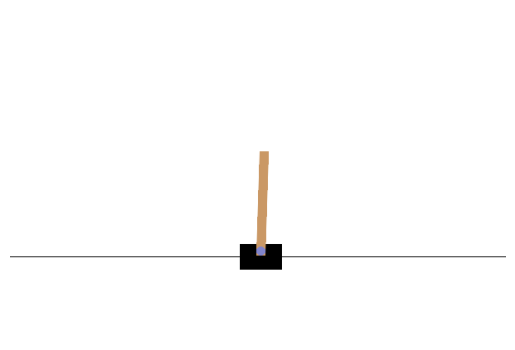

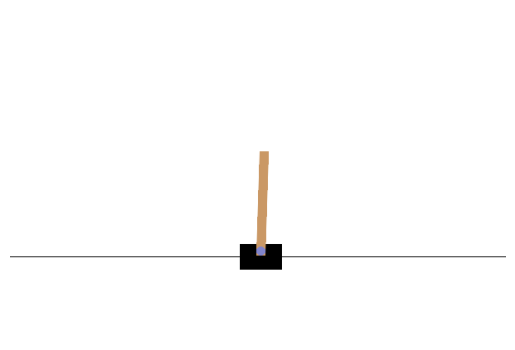

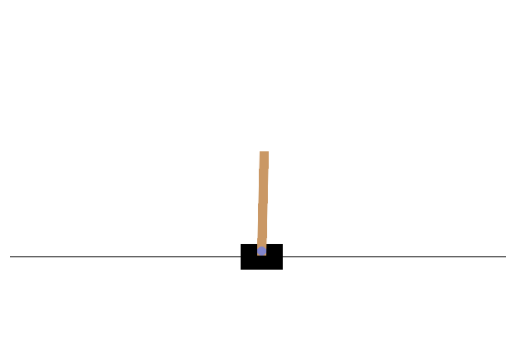

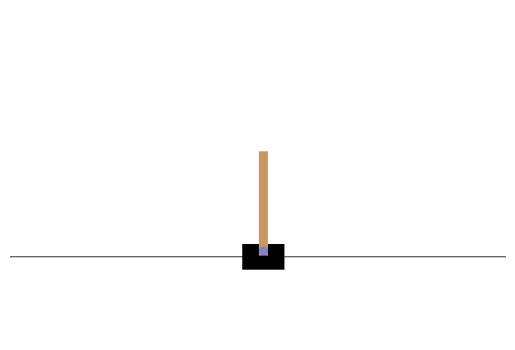

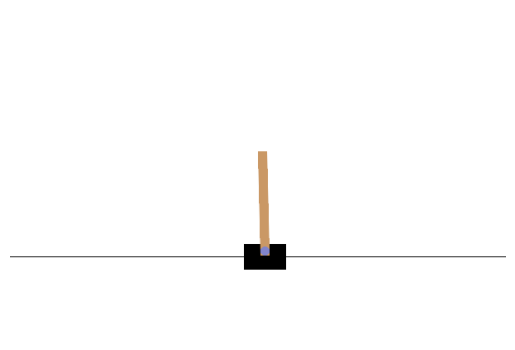

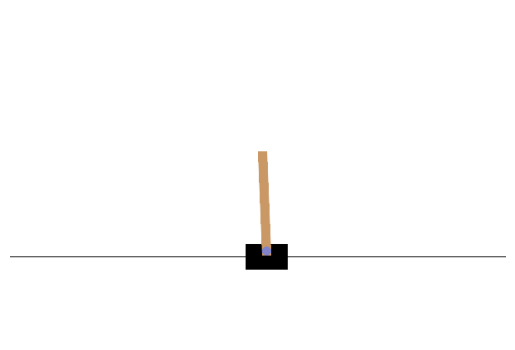

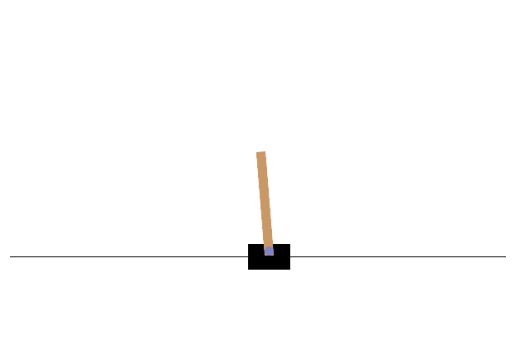

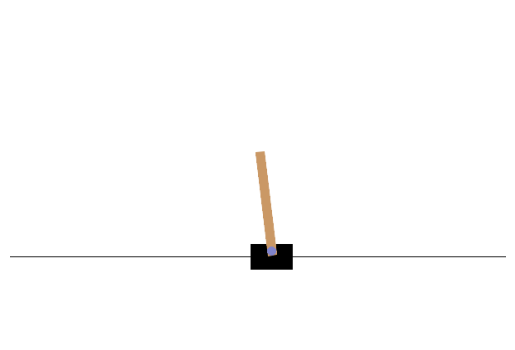

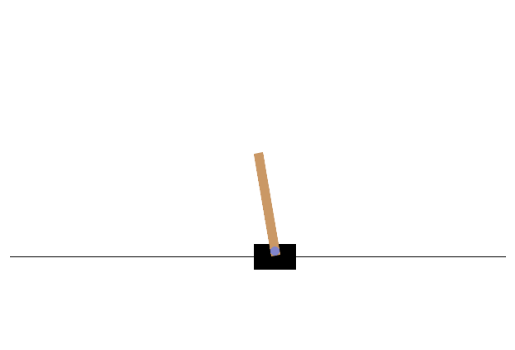

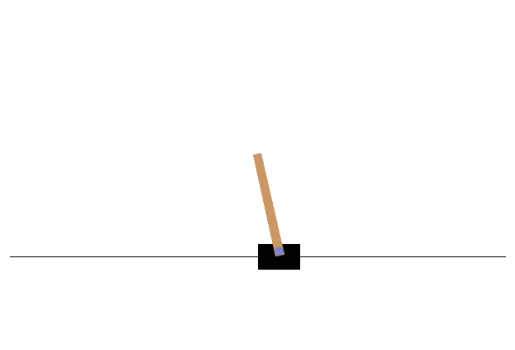

Episode 1 finished. Total reward: 10.0


<Figure size 640x480 with 0 Axes>

In [ ]:
import gymnasium as gym
import matplotlib.pyplot as plt


def render_frame(env):
    """Render a single frame of the environment using matplotlib."""
    frame = env.render()    # Get the current frame
    plt.imshow(frame)       # Display the frame
    plt.axis("off")         # Turn off axis labels
    plt.show(block=False)   # Show the frame without blocking
    plt.pause(0.001)        # Small pause for smoother animation
    plt.clf()               # Clear figure for the next frame


def run_cartpole(seed: int = 42, episodes: int = 1):
    """Run the CartPole environment with a simple policy (always move right)."""
    env = gym.make("CartPole-v1", render_mode="rgb_array")

    for ep in range(episodes):
        state, info = env.reset(seed=seed if ep == 0 else None)
        print(f"\nEpisode {ep + 1} — Initial state: {state}")

        terminated, truncated = False, False
        total_reward = 0

        while not (terminated or truncated):
            action = 1  # Simple policy: always move right
            state, reward, terminated, truncated, info = env.step(action)
            total_reward += reward

            render_frame(env)

        print(f"Episode {ep + 1} finished. Total reward: {total_reward}")

    env.close()


if __name__ == "__main__":
    run_cartpole(episodes=1)